<b>Name: George Mathew <br>
Student ID: 8966959<br>
Section: 2<br>
Dataset Used : Diabetes dataset</b> - [Link](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

### Part 1: Data Exploration and Preprocessing
1. Get the data:

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes(as_frame=True)  # Loading data as a pandas DataFrame
diabetes


{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

2. Frame the Problem: <br>


3. EDA (Exploratory Data Analysis):

* Descriptive statistics:

In [2]:
diabetes_df = diabetes.frame
print(diabetes_df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

* Scatter Plots and Histograms:

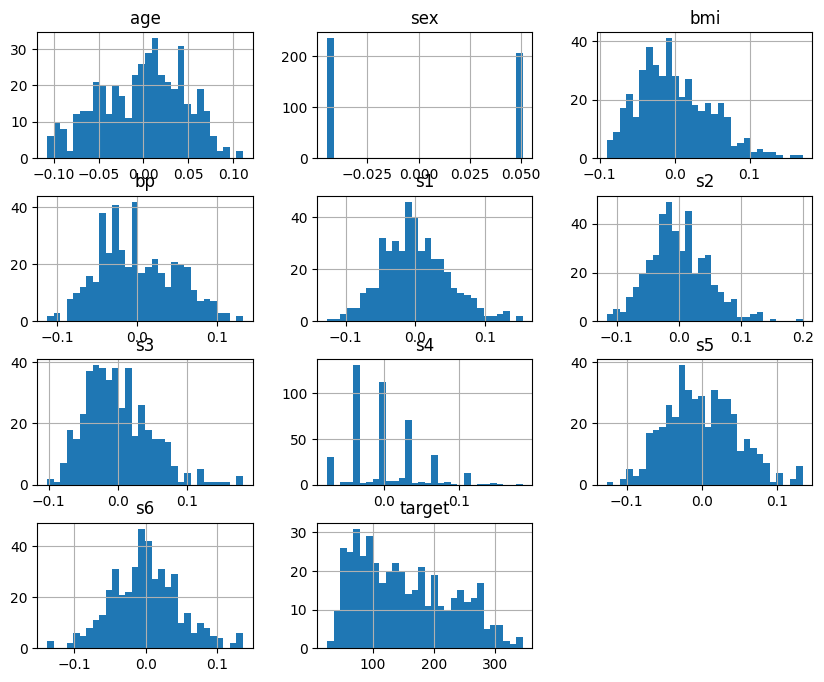

In [3]:
import matplotlib.pyplot as plt
diabetes_df.hist(bins=30, figsize=(10, 8))
plt.show()

* Correlation Matrix:

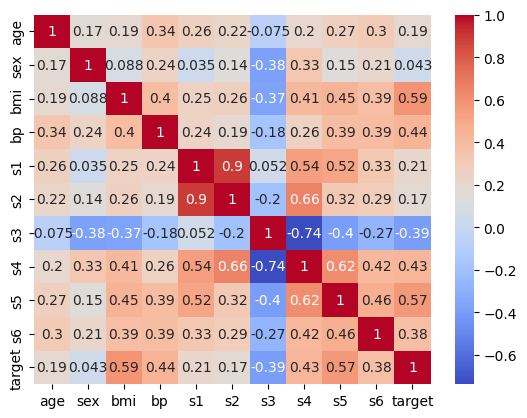

In [4]:
import seaborn as sns
corr = diabetes_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

4. Clean the Data

In [5]:
print(diabetes_df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


Since it's a clean dataset, minimal cleaning is required, but check for null values

5. Split the Dataset

In [6]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop(columns='target')
y = diabetes_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

### Part 2: Model Implementation

6. Univariate Polynomial Regression:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

degrees = [0, 1, 2, 3, 4, 5]
metrics = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train[['bmi']])
    X_val_poly = poly.transform(X_val[['bmi']])
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    metrics.append({
        'Degree': degree,
        'Train R²': r2_score(y_train, y_train_pred),
        'Val R²': r2_score(y_val, y_val_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Val MAE': mean_absolute_error(y_val, y_val_pred),
        'Train MAPE': mean_absolute_percentage_error(y_train, y_train_pred),
        'Val MAPE': mean_absolute_percentage_error(y_val, y_val_pred)
    })

# Convert metrics to DataFrame
import pandas as pd
results_df = pd.DataFrame(metrics)
print(results_df)

   Degree  Train R²    Val R²  Train MAE    Val MAE  Train MAPE  Val MAPE
0       0  0.000000 -0.106957  66.201641  66.057059    0.628267  0.712639
1       1  0.349672  0.331264  52.287739  47.208472    0.483629  0.470600
2       2  0.350764  0.331631  52.207314  47.213700    0.482985  0.472397
3       3  0.350774  0.331638  52.198968  47.185414    0.482807  0.472227
4       4  0.353014  0.340758  52.092653  46.090118    0.480533  0.460503
5       5  0.354100  0.349881  52.059191  45.462121    0.480040  0.451753


7. Compare Models

* Train R² and Validation R²: The performance of the models improves as we increase the degree of the polynomial. The highest validation R² is 0.349881 for degree 5.
* MAE (Mean Absolute Error): The validation MAE decreases as we increase the polynomial degree, with the lowest value (45.462121) at degree 5.
* MAPE (Mean Absolute Percentage Error): Similarly, MAPE decreases as the polynomial degree increases, with the lowest validation MAPE (0.451753) for degree 5.

8. Best Model

Based on Validation R², Validation MAE, and Validation MAPE, the degree 5 polynomial model appears to perform the best across the validation set. It has the highest validation R², lowest validation MAE, and lowest validation MAPE.

9. Test on Test Set

In [8]:
# Use the best degree
best_degree = 5 

# Initialize PolynomialFeatures with the best degree
poly = PolynomialFeatures(best_degree)

# Fit the PolynomialFeatures on the training data (BMI feature)
X_train_poly = poly.fit_transform(X_train[['bmi']])

# Now we can use transform on the test set (without fitting again on test data)
X_test_poly = poly.transform(X_test[['bmi']])

# Fit the linear regression model using the training set
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test_poly)

# Evaluate the model on the test set
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Test R-squared: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")

Test R-squared: 0.26669658449530775
Test MAE: 51.75025709277397
Test MAPE: 0.4302671323305443


Test R-squared: 0.26669658449530775
Test MAE: 51.75025709277397
Test MAPE: 0.4302671323305443

10. Plot the Train, Validation, and Test Data Points


c:\Users\ASUS\Documents\AAIML\Foundations of Machine Learning Frameworks\venv\CSCN8010_classical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


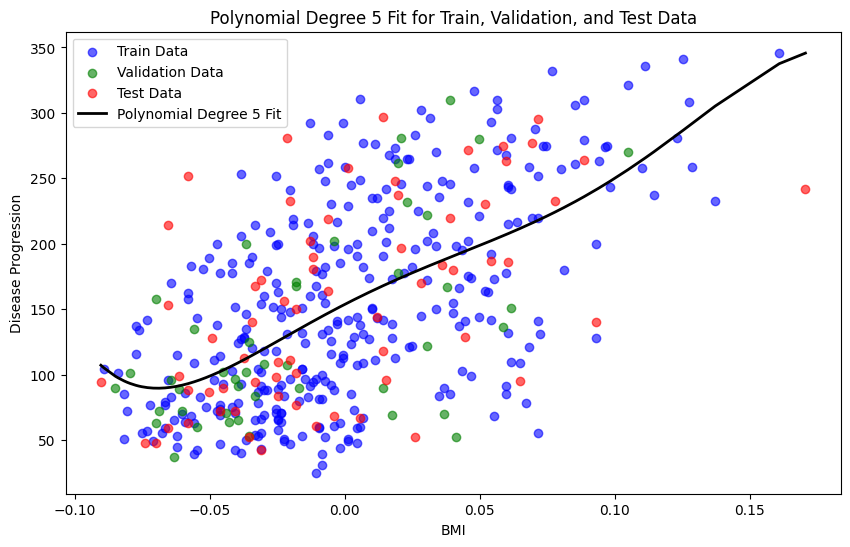

In [9]:
import numpy as np

# Combine the training, validation, and test data
X_all = np.concatenate([X_train[['bmi']], X_val[['bmi']], X_test[['bmi']]])
y_all = np.concatenate([y_train, y_val, y_test])

# Transform the combined data using the polynomial features
X_all_poly = poly.transform(X_all)

# Get the predictions for all data points
y_all_pred = model.predict(X_all_poly)

# Sort the data points based on BMI for smooth plotting
sort_index = np.argsort(X_all.flatten())
X_all_sorted = X_all[sort_index]
y_all_pred_sorted = y_all_pred[sort_index]

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_train['bmi'], y_train, color='blue', label='Train Data', alpha=0.6)
plt.scatter(X_val['bmi'], y_val, color='green', label='Validation Data', alpha=0.6)
plt.scatter(X_test['bmi'], y_test, color='red', label='Test Data', alpha=0.6)
plt.plot(X_all_sorted, y_all_pred_sorted, color='black', label=f'Polynomial Degree {best_degree} Fit', linewidth=2)

plt.title(f'Polynomial Degree {best_degree} Fit for Train, Validation, and Test Data')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

11. Write Down the Equation of the Best Model


In [10]:
# Get the coefficients of the degree 5 polynomial model
coefficients = model.coef_
intercept = model.intercept_

# Write down the equation
print("Equation of the Degree 5 Polynomial Model:")
terms = [f"{coefficients[i]:.2f} * BMI^{i}" for i in range(len(coefficients))]
equation = " + ".join(terms)
equation = f"y = {intercept:.2f} + " + equation
print(equation)


Equation of the Degree 5 Polynomial Model:
y = 153.65 + 0.00 * BMI^0 + 1059.89 * BMI^1 + -3824.15 * BMI^2 + -16770.23 * BMI^3 + 753722.52 * BMI^4 + -2993716.57 * BMI^5


12. Calculate the Expected Disease Progression for a Given BMI


In [11]:
# Define a BMI value for prediction
bmi_value = 30  # we can change this to any value of our choice

# Transform the BMI value into polynomial features
bmi_poly = poly.transform([[bmi_value]])

# Predict the disease progression
disease_progression = model.predict(bmi_poly)
print(f"Predicted disease progression for BMI = {bmi_value}: {disease_progression[0]:.2f}")

Predicted disease progression for BMI = 30: -72137253699190.52


c:\Users\ASUS\Documents\AAIML\Foundations of Machine Learning Frameworks\venv\CSCN8010_classical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


13. Trainable Parameters for Each Model

In [12]:
# Print the number of features (trainable parameters) for degree 5
n_trainable_params = len(poly.get_feature_names_out())
print(f"Number of trainable parameters for degree 5 model: {n_trainable_params}")

Number of trainable parameters for degree 5 model: 6


14. Conclusion

The degree 5 polynomial model overfits the data, leading to unrealistic predictions and poor generalization. The model's complexity resulted in large, unstable coefficients, making it unreliable for making predictions on new data. A simpler model or one with regularization would likely perform better, providing more accurate and meaningful results.

### PART 3

1. Feature Engineering and Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the diabetes dataset
data = datasets.load_diabetes(as_frame=True)
df = data.frame

# Split the data into features (X) and target (y)
X = df.drop(columns=['target'])  # All features
y = df['target']  # Target variable

# Perform train, validation, test split (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

2. Polynomial Models

We'll create polynomial regression models of degrees 2 and 3.

In [14]:
# Define degrees
degrees = [2, 3]

for degree in degrees:
    poly = PolynomialFeatures(degree)
    
    # Transform training, validation, and test data
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_val_poly = poly.transform(X_val_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict and evaluate
    y_val_pred = model.predict(X_val_poly)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    print(f"Polynomial Degree {degree} | Val R²: {val_r2}, Val MAE: {val_mae}, Val MAPE: {val_mape}")


Polynomial Degree 2 | Val R²: 0.41657702666282104, Val MAE: 47.31951349431818, Val MAPE: 0.4446421471827937
Polynomial Degree 3 | Val R²: -8073.198179141716, Val MAE: 3358.3522578222273, Val MAPE: 25.42059690251745


3. Decision Trees

We will create two decision tree models with different values for max_depth (i.e.,3 and 5).

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Define max_depth values
depths = [3, 5]

for depth in depths:
    # Initialize Decision Tree model
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    
    # Train the model
    tree_model.fit(X_train_scaled, y_train)
    
    # Predict and evaluate on validation set
    y_val_pred = tree_model.predict(X_val_scaled)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    print(f"Decision Tree (max_depth={depth}) | Val R²: {val_r2}, Val MAE: {val_mae}, Val MAPE: {val_mape}")


Decision Tree (max_depth=3) | Val R²: 0.41466044699854776, Val MAE: 46.97812650590113, Val MAPE: 0.39921351783645515
Decision Tree (max_depth=5) | Val R²: 0.33558300742370006, Val MAE: 49.11838274399877, Val MAPE: 0.4176292302679021


4. k-Nearest Neighbors (kNN)

Next, we'll implement two kNN models with different values of n_neighbors (e.g., 3 and 5).

In [16]:
from sklearn.neighbors import KNeighborsRegressor

# Define different values for n_neighbors
neighbors = [3, 5]

for k in neighbors:
    # Initialize kNN model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    # Train the model
    knn_model.fit(X_train_scaled, y_train)
    
    # Predict and evaluate on validation set
    y_val_pred = knn_model.predict(X_val_scaled)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    print(f"kNN (n_neighbors={k}) | Val R²: {val_r2}, Val MAE: {val_mae}, Val MAPE: {val_mape}")


kNN (n_neighbors=3) | Val R²: 0.44062006203209725, Val MAE: 42.5719696969697, Val MAPE: 0.392242365433189
kNN (n_neighbors=5) | Val R²: 0.42235100597692576, Val MAE: 45.45227272727273, Val MAPE: 0.40638393162481745


Based on the validation results, the k-Nearest Neighbors (kNN) model with n_neighbors=3 has the highest validation R² score (0.4406) and the lowest MAE (42.57). Therefore, we will evaluate this model on the test set.

5. Evaluation on Test Set

In [17]:
# Retrain kNN with n_neighbors=3 on training + validation data
from sklearn.neighbors import KNeighborsRegressor

# Combine training and validation sets
X_train_val = np.vstack((X_train_scaled, X_val_scaled))
y_train_val = np.concatenate((y_train, y_val))

# Initialize and train the best kNN model
best_knn_model = KNeighborsRegressor(n_neighbors=3)
best_knn_model.fit(X_train_val, y_train_val)

# Predict on the test set
y_test_pred = best_knn_model.predict(X_test_scaled)

# Calculate evaluation metrics
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the test set evaluation results
print(f"Test R²: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")


Test R²: 0.24208247751069534
Test MAE: 52.74906367041198
Test MAPE: 0.3813969474341721


Conclusion

The kNN model (with n_neighbors=3) performed the best on the validation set, but its performance on the test set was not as good. The test results show that the model struggles to generalize to new data, with only 24% of the test variance explained (Test R² = 0.242) and an average error of about 52.75 units. The model's predictions have a significant percentage error of 38%.

In short, while the model looked promising during validation, it didn't perform as well on unseen test data, indicating room for improvement in feature selection or model tuning.